<a href="https://www.kaggle.com/code/rever3nd/ml-binary-classification-case-study?scriptVersionId=127082904" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# This is a Case Study from a given Dataset to Predict if the people comes under 50K income or over 50K income

## We are solving the Case Study with Logistic Regression Algorithm as we need to classify the data Binarily

In [1]:
# Import all the required packages/libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

### Set the random 'seed' for consistent results for every execution

In [3]:
# Set the seed for random state
np.random.seed(100)

### Loading the data from Input Dataset

In [4]:
# load the data
data_train = pd.read_csv("/kaggle/input/income-50k-dataset/train.csv")
X = data_train.drop(columns='income_>50K')
y = data_train['income_>50K']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=30)
X_test = pd.read_csv("/kaggle/input/income-50k-dataset/test.csv")
print(X.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(43957, 14)
(35165, 14)
(8792, 14)
(899, 14)


### Checking the correlation between different Features

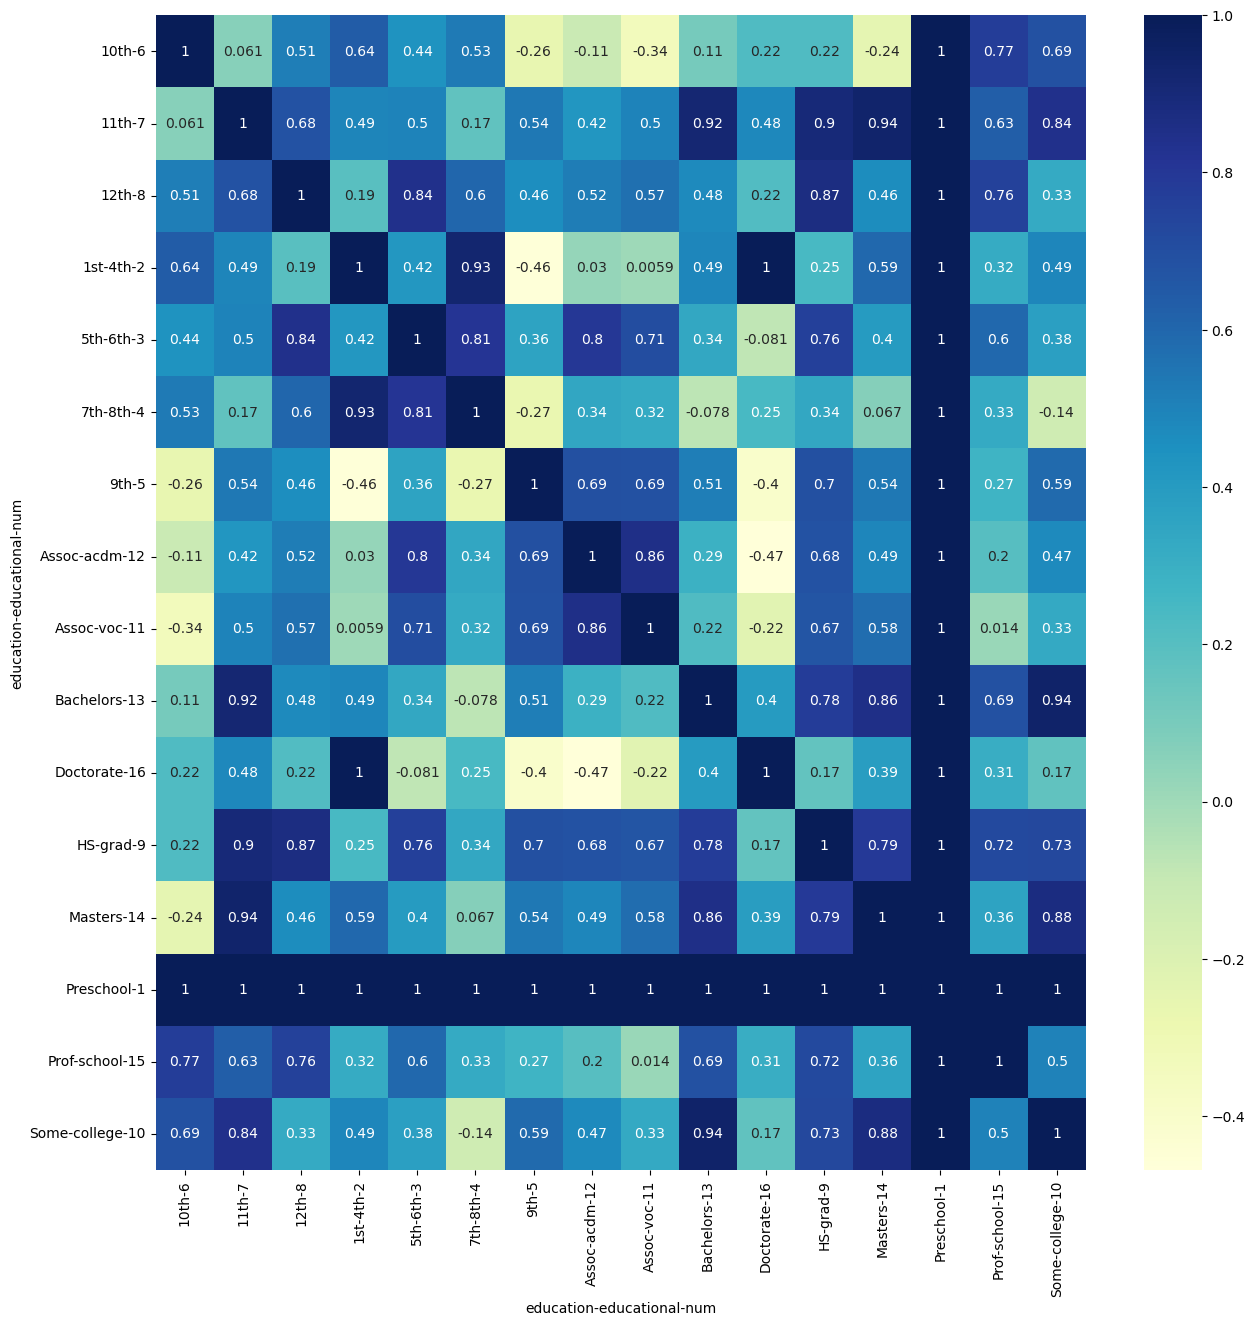

In [5]:
plt.figure(figsize=(15, 15))
matrix1 = X_valid.pivot_table(index=['workclass'], columns=['education','educational-num'], values='age')
sns.heatmap(matrix1.corr(), annot=True, cmap="YlGnBu")
plt.show()

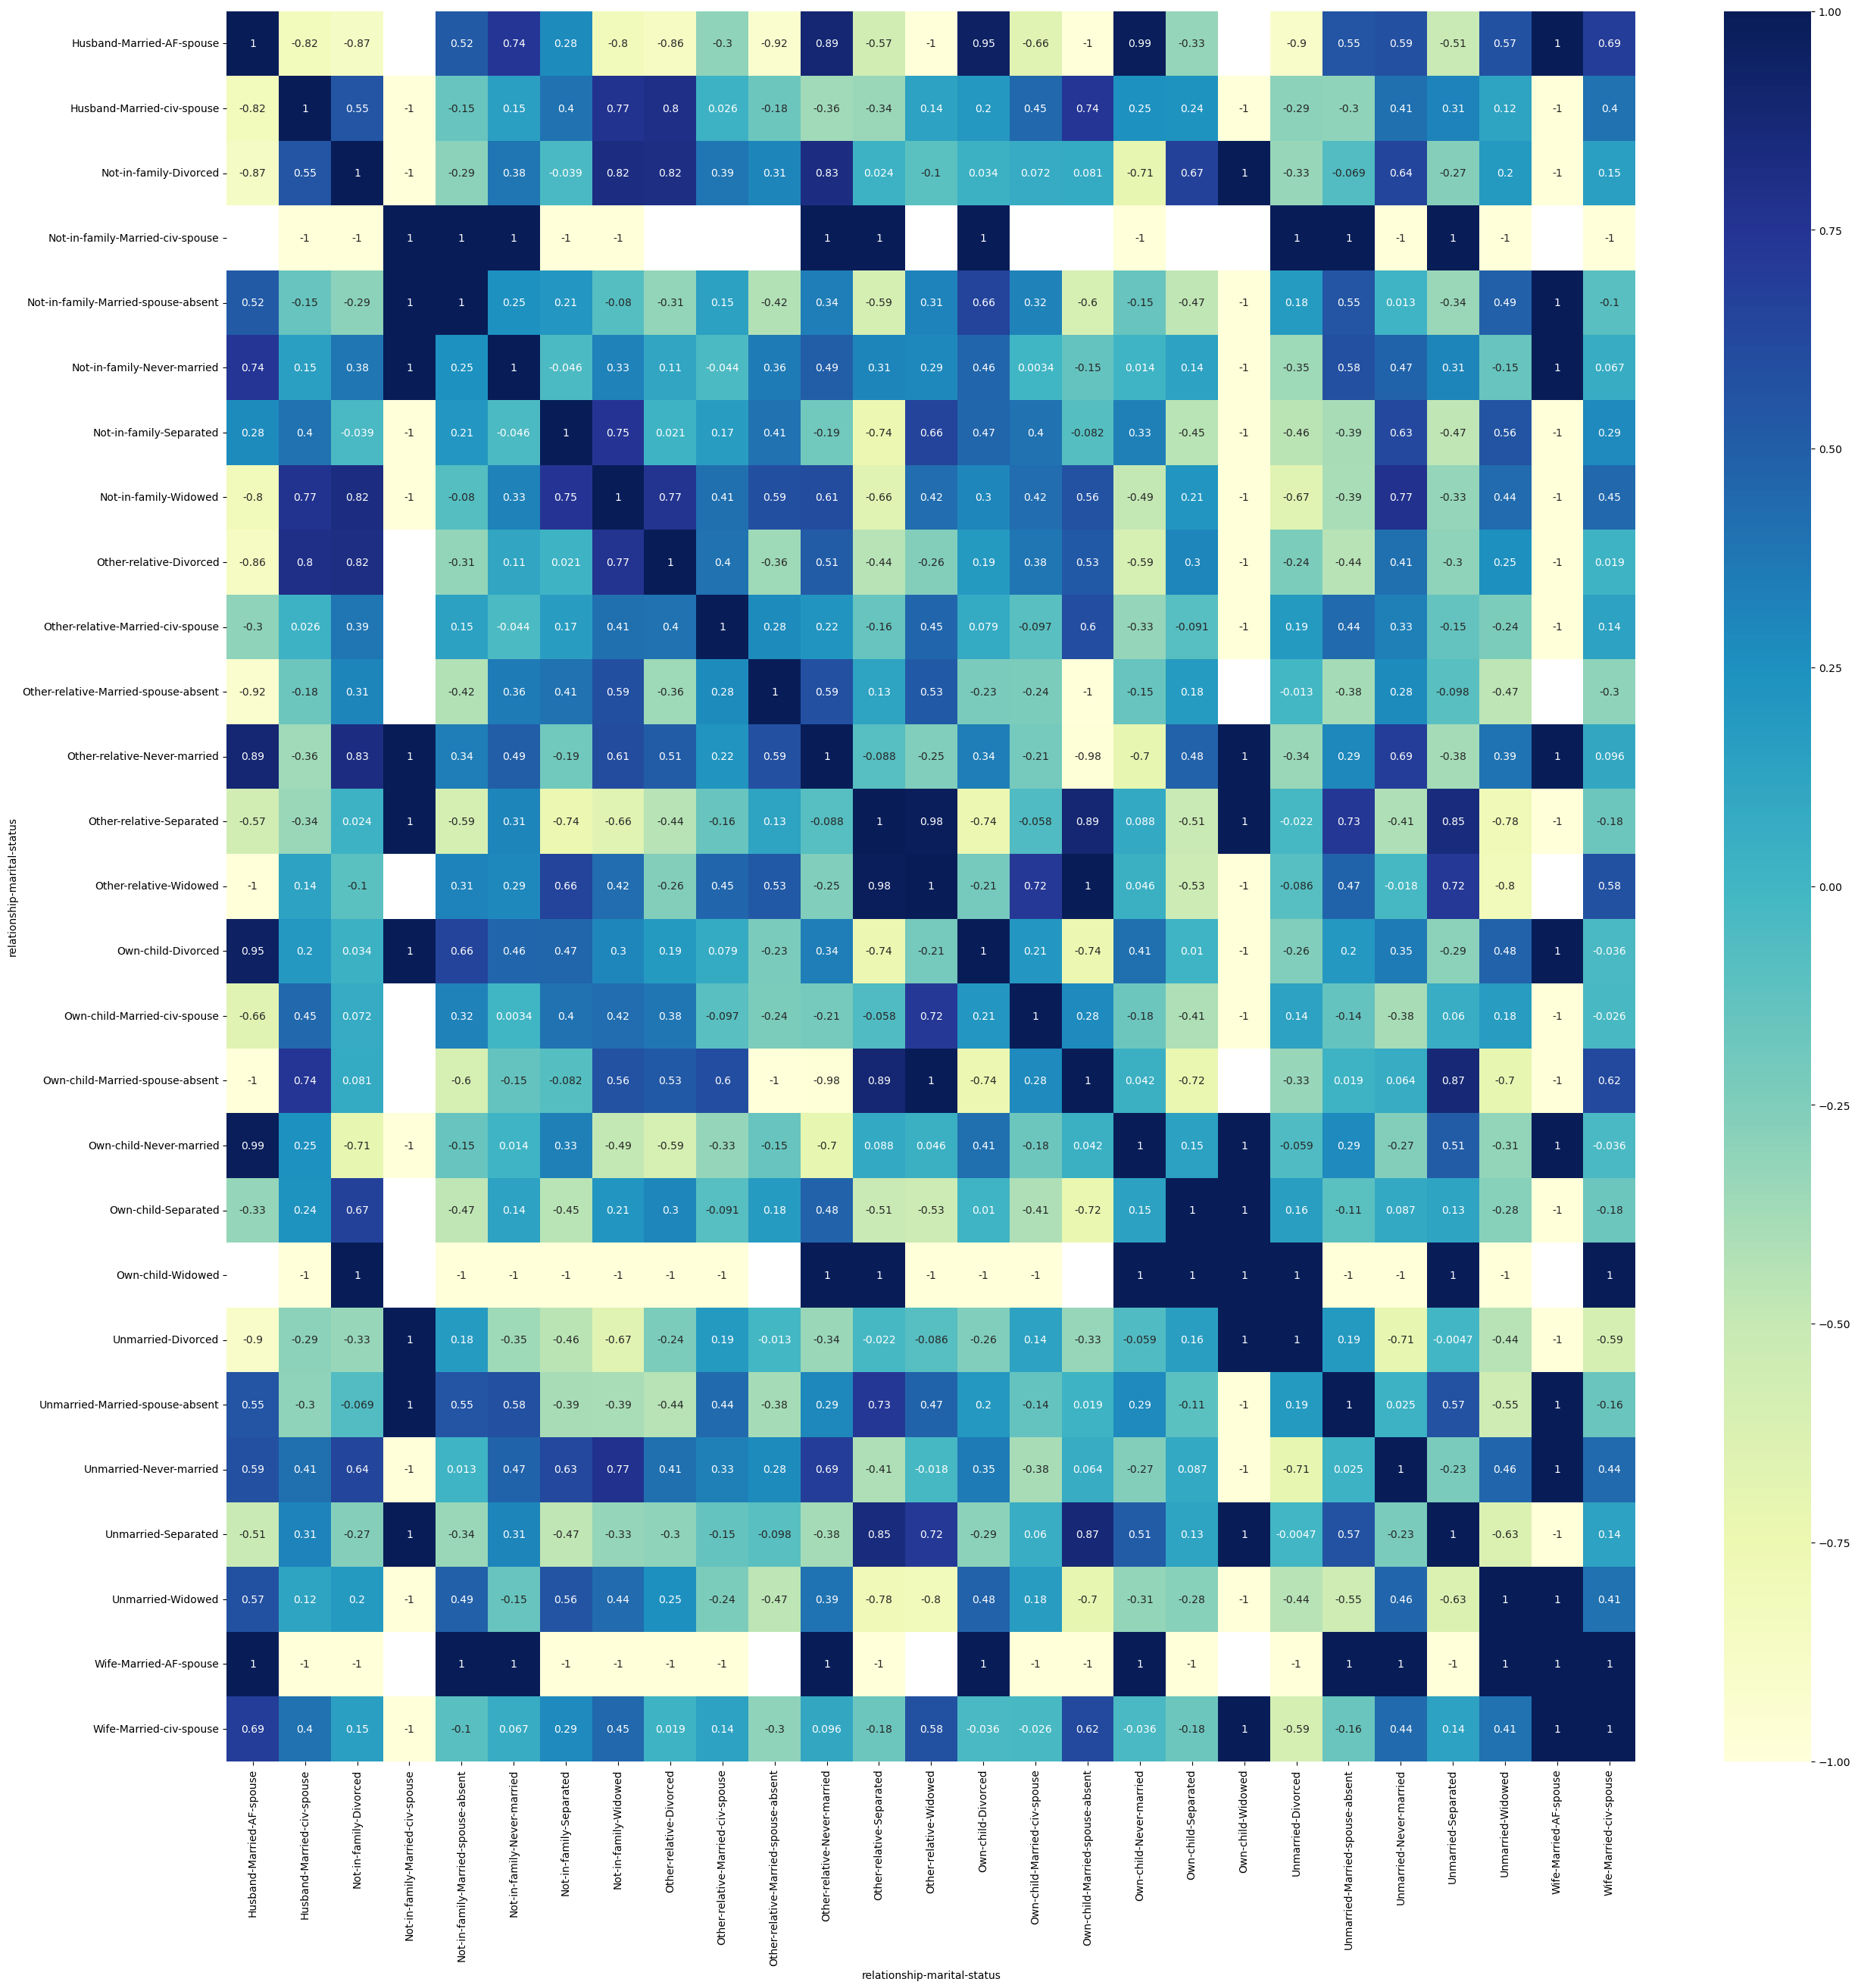

In [6]:
plt.figure(figsize=(30, 30))
matrix2 = X_valid.pivot_table(index=['occupation'], columns=['relationship','marital-status'], values='age')
sns.heatmap(matrix2.corr(), annot=True, cmap="YlGnBu")
plt.show()

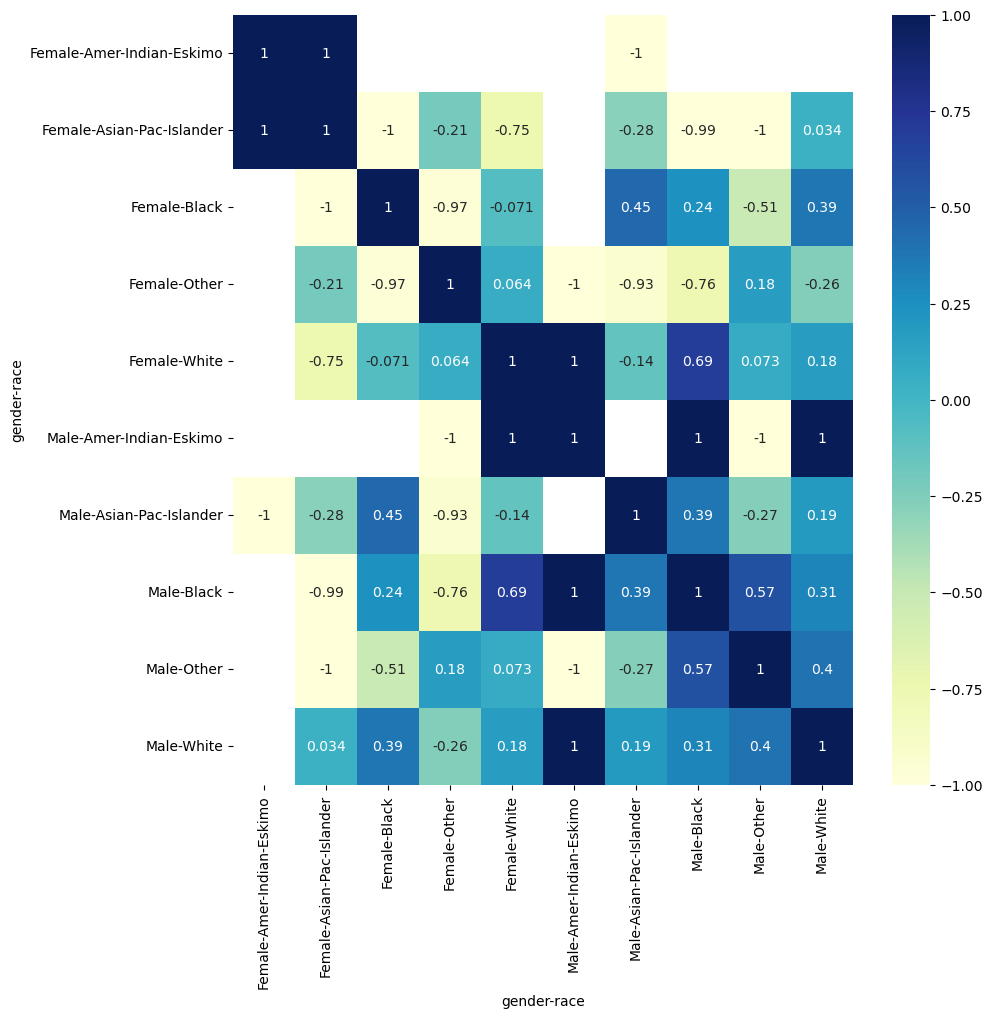

In [7]:
plt.figure(figsize=(10, 10))
matrix3 = X_valid.pivot_table(index=['native-country'], columns=['gender','race'], values='age')
sns.heatmap(matrix3.corr(), annot=True, cmap="YlGnBu")
plt.show()

### For categorical features we are using OneHotEncoder, For Sparse Numerical Features we are using MaxAbsScaler, Large Numerical Features we are using StandardScaler from sklearn.preprocessing module

In [8]:
# Define the preprocessing steps for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num1', StandardScaler(), ['fnlwgt']),
        ('num2', MaxAbsScaler(),['capital-gain', 'capital-loss']),
        ('cat', OneHotEncoder(), ['workclass','education','marital-status', 'native-country','gender','occupation','relationship','race'
])
    ])

### We are using Logistic Regression with solver, "SAG" or "Stochastic Average Gradient Algorithm" as we have relatively large dataset(40k+)

In [9]:
# Define the logistic regression model
logreg = LogisticRegression(solver='sag')

### Creating a Pipeline for the model

In [10]:
# Create a pipeline combining the preprocessing steps and the model
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('model', logreg)])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

#Comparing accuracy score between Test data and validation data
print(pipe.score(X_train, y_train))
print(pipe.score(X_valid, y_valid))

#predicting Test data labels
y_pred = pipe.predict(X_test)

0.8502203895919238
0.853616924476797


### Saving the results to a CSV file

In [11]:
# Saving the results
result = pd.DataFrame(y_pred, columns=['outcome'])
result.index.name = 'id'
result.to_csv("/kaggle/working/result.csv")